In [8]:
import pandas as pd
import skimage.io
import skimage.feature
import skimage.transform
import sklearn.decomposition
import os
import matplotlib.pyplot as plt
import numpy as np

data_dir = "data"

train_df = pd.read_parquet(os.path.join(data_dir, "train.parquet"))
train_features = np.array(train_df["features"].to_list())

test_df = pd.read_parquet(os.path.join(data_dir, "test.parquet"))
test_features = np.array(test_df["features"].to_list())

In [9]:
train_features.shape

(4256, 7200)

In [10]:
test_features.shape

(133, 7200)

In [11]:
pca = sklearn.decomposition.PCA(n_components=512)

reduced_train_features = pca.fit_transform(train_features)
reduced_test_features = pca.transform(test_features)

reduced_train_features.shape

(4256, 512)

In [12]:
from sklearn.svm import SVC

X_train = reduced_train_features
X_test = reduced_test_features
y_train = train_df["label"].to_numpy()
y_test = test_df["label"].to_numpy()


model = SVC()
model.fit(X_train, y_train)

SVC()

In [13]:
y_test.shape

(133,)

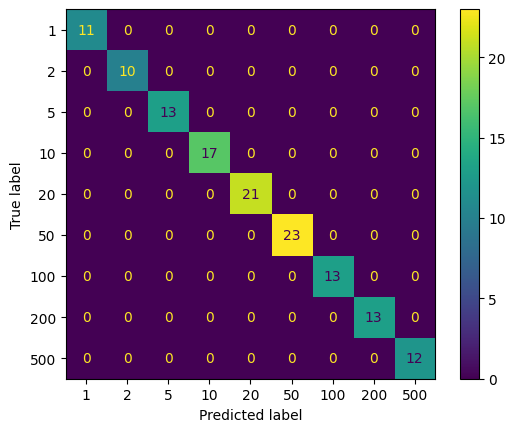

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)